In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf 
import cv2
import matplotlib.pyplot as plt 
import os 
import numpy as np 


In [2]:
img = image.load_img("basedata/train/happy/3.JPG")

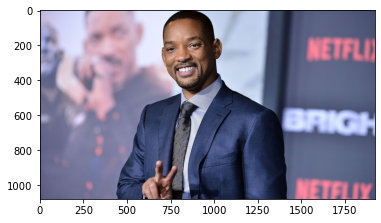

In [3]:
plt.imshow(img)

In [20]:
cv2.imread("basedata/train/happy/3.JPG").shape

(1080, 1920, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [21]:
train_dataset = train.flow_from_directory('basedata/train/',
target_size=(200,200),
batch_size=3, 
class_mode ='binary')
validation_dataset = validation.flow_from_directory('basedata/validation/',
target_size=(200,200),
batch_size=3, 
class_mode ='binary')

Found 10 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'Not_happy': 0, 'happy': 1}

In [25]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [50]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(200,200,3)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        ##
                                        tf.keras.layers.Flatten(),
                                        ##
                                        tf.keras.layers.Dense(512,activation= 'relu'),
                                        ##
                                        tf.keras.layers.Dense(1,activation='sigmoid')
                                        ])

In [52]:
model.compile ( loss = 'binary_crossentropy',
optimizer = RMSprop(learning_rate=0.001),
metrics = ['accuracy'])

In [54]:
model_fit = model.fit(train_dataset,
steps_per_epoch=3,
epochs=10,
validation_data= validation_dataset) 

Epoch 1/10
3/3 [==============================] - 4s 756ms/step - loss: 5.4613 - accuracy: 0.5714
Epoch 2/10
3/3 [==============================] - 1s 276ms/step - loss: 1.5167 - accuracy: 0.4444
Epoch 3/10
3/3 [==============================] - 1s 311ms/step - loss: 3.0578 - accuracy: 0.7143
Epoch 4/10
3/3 [==============================] - 1s 278ms/step - loss: 0.9638 - accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 1s 289ms/step - loss: 0.6434 - accuracy: 0.5714
Epoch 6/10
3/3 [==============================] - 1s 231ms/step - loss: 0.5499 - accuracy: 0.7143
Epoch 7/10
3/3 [==============================] - 1s 229ms/step - loss: 0.4529 - accuracy: 0.8571
Epoch 8/10
3/3 [==============================] - 1s 300ms/step - loss: 0.2432 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 1s 321ms/step - loss: 0.1490 - accuracy: 0.8889
Epoch 10/10
3/3 [==============================] - 1s 287ms/step - loss: 0.4868 - accuracy: 0.8571


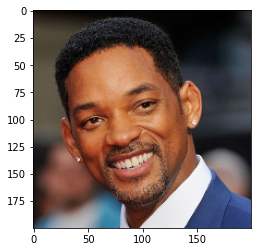

you are happy


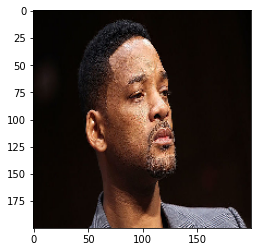

you are not happy


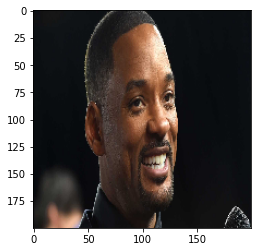

you are happy


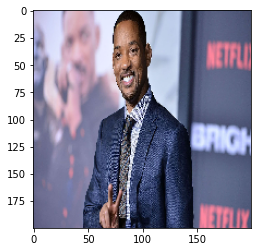

you are not happy


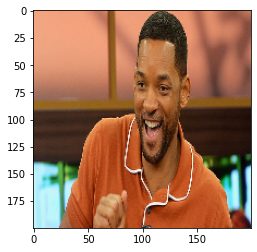

you are happy


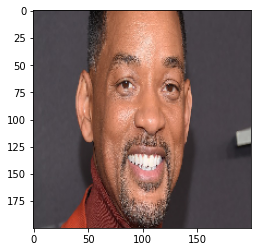

you are not happy


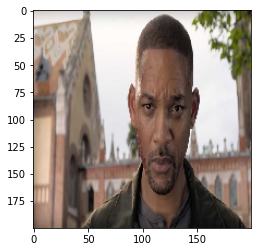

you are not happy


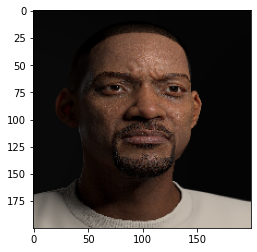

you are not happy


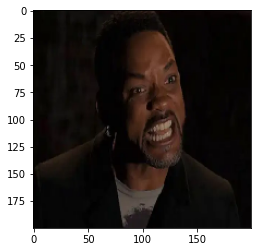

you are not happy


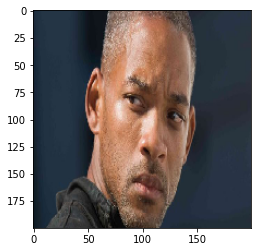

you are not happy


In [57]:
dir_path = 'basedata/test'
for i in os.listdir(dir_path) :
	img = image.load_img(dir_path+'//'+i,target_size=(200,200))
	plt.imshow(img)
	plt.show()
	X= image.img_to_array(img)
	X= np.expand_dims(X,axis =0)
	images = np.vstack([X])
	val = model.predict(images)
	if val == 0:
		print("you are not happy")
	else :	
		print("you are happy")